In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
canc = pd.read_csv("haberman.csv",names=['age', 'year', 'nodes', 'status'])
canc.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
canc.shape

(306, 4)

 Observation:
 
 There are 306 rows and 4 columns

In [5]:
canc.columns  #Displaying all column names

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [6]:
canc["status"].value_counts()


1    225
2     81
Name: status, dtype: int64

### Observation
status (class attribute) 

1 = the patient survived 5 years or longer

2 = the patient died within 5 year

 From the values we can infer that 225 people who have undergone operation have

survived for more than 5 years and 81 people have died within 5 years

Thus it is an imbalance dataset

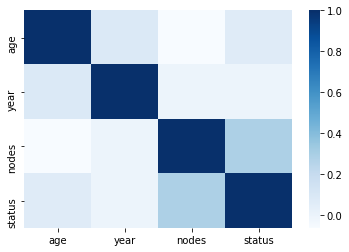

In [7]:
sns.heatmap(canc.corr(),cmap="Blues")

### Observation:
We can infer that status is  correlated with number of nodes


Also age shows a weak correlation with status

In [8]:
canc.corr()

,age,year,nodes,status
age,1.000000,0.089529,-0.063176,0.067950
year,0.089529,1.000000,-0.003764,-0.004768
nodes,-0.063176,-0.003764,1.000000,0.286768
status,0.067950,-0.004768,0.286768,1.000000


In [9]:
canc.dtypes  #Knowing the data type of attributes

age       int64
year      int64
nodes     int64
status    int64
dtype: object

In [10]:
canc.isnull().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

### Observation
There are no null values in the dataset

## Data Visualization

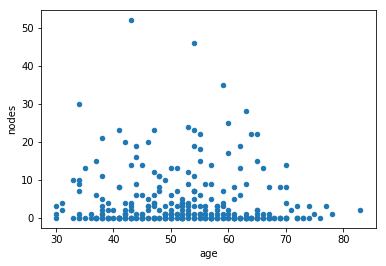

In [11]:
canc.plot(kind="scatter",x="age",y="nodes")
plt.show()

In [12]:
canc["age"].mean()

52.45751633986928

Observation:
People at the age of 52 are more likely to be affected by this disease

In [13]:
canc["nodes"].mean()

4.026143790849673

Observation: On an average a person is detected with atleast 4 nodes

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


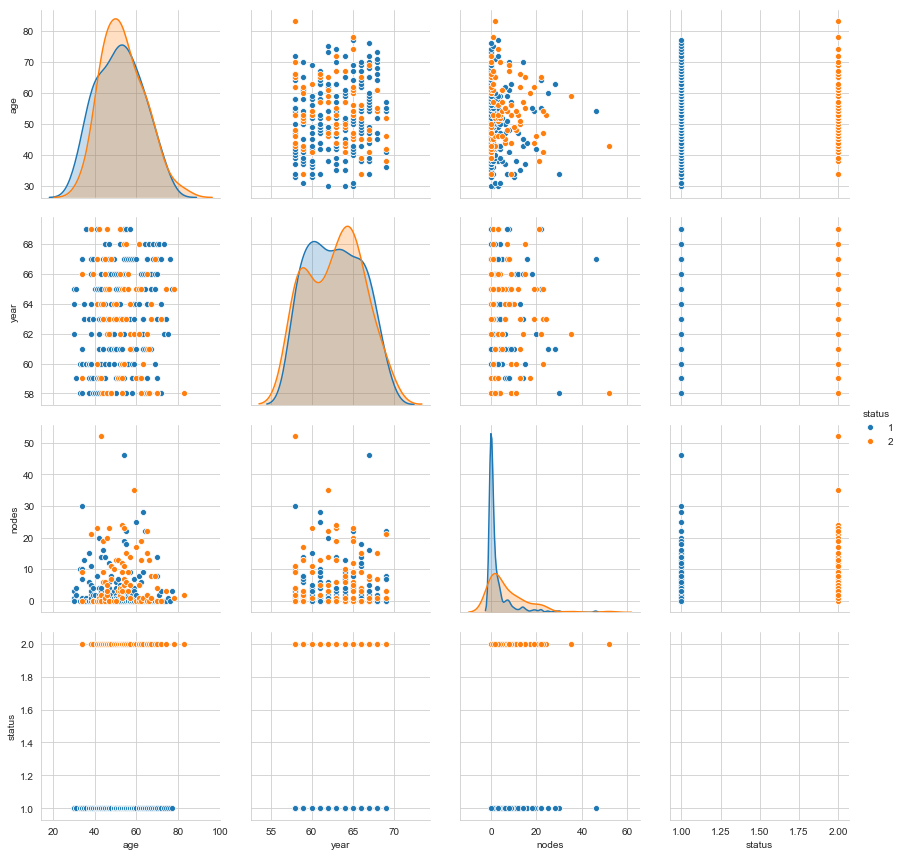

In [14]:
sns.set_style("whitegrid")
sns.pairplot(canc,hue="status",height=3)
plt.show()

### Univariate Analysis

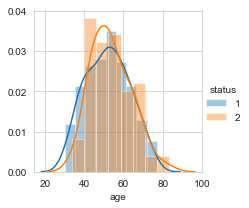

In [15]:
sns.FacetGrid(canc,hue="status").map(sns.distplot,"age").add_legend()



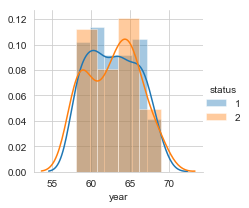

In [16]:
sns.FacetGrid(canc,hue="status").map(sns.distplot,"year").add_legend()

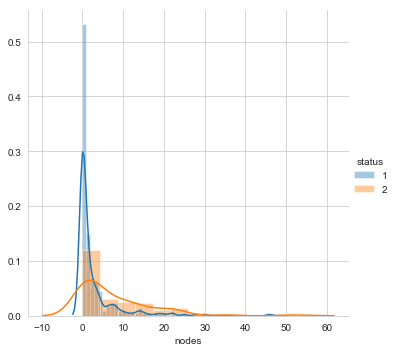

In [17]:
sns.FacetGrid(canc,hue="status",height=5).map(sns.distplot,"nodes").add_legend()

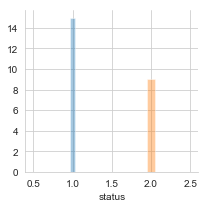

In [18]:
sns.FacetGrid(canc,hue="status").map(sns.distplot,"status")

### Mean

In [19]:
print("Average age " , canc['age'].mean() )
print("Average  nodes " , canc['nodes'].mean())
print('-'*40)
print("Average age when status = 1 is ", canc['age'][canc["status"]==1].mean())
print("Average age when status = 2 is ", canc['age'][canc["status"]==2].mean())
print('-'*40)
print("Average number of nodes when status = 1 is", canc["nodes"][canc["status"]==1].mean())
print("Average number of nodes when status = 2 is", canc["nodes"][canc["status"]==2].mean())



Average age  52.45751633986928
Average  nodes  4.026143790849673
----------------------------------------
Average age when status = 1 is  52.01777777777778
Average age when status = 2 is  53.67901234567901
----------------------------------------
Average number of nodes when status = 1 is 2.7911111111111113
Average number of nodes when status = 2 is 7.45679012345679


### Median

In [20]:
print("Median age " , canc['age'].median() )
print("Median  nodes " , canc['nodes'].median())
print('-'*40)
print("Median age when status = 1 is ", canc['age'][canc["status"]==1].median())
print("Median age when status = 2 is ", canc['age'][canc["status"]==2].median())
print('-'*40)
print("Median number of nodes when status = 1 is", canc["nodes"][canc["status"]==1].median())
print("Median number of nodes when status = 2 is", canc["nodes"][canc["status"]==2].median())


Median age  52.0
Median  nodes  1.0
----------------------------------------
Median age when status = 1 is  52.0
Median age when status = 2 is  53.0
----------------------------------------
Median number of nodes when status = 1 is 0.0
Median number of nodes when status = 2 is 4.0


### Standard deviation

In [21]:
print("Standard Deviation of age is :",canc['age'].std())
print("Standard Deviation of nodes is :",canc['nodes'].std())
print("Standard Deviation of year is : ",canc['year'].std())

Standard Deviation of age is : 10.80345234930328
Standard Deviation of nodes is : 7.189653506248565
Standard Deviation of year is :  3.249404663223851


### Using KNN Classification to find the status given number of nodes, age 

In [22]:
#Importing the required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split

In [23]:
#Splitting data
y = canc['status'] #Dependent Variable
x = canc.drop(['status','year'],axis=1) #Independent Variable
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [24]:
train_accuracy = []
test_accuracy= []
for k in range(1,10,1):
    print("k=",k)
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train,y_train)
    ytrain_pred = neigh.predict(x_train)
    print("Training accuracy is : ",accuracy_score(y_train,ytrain_pred))
    print("Confusion Matrix is :\n ", confusion_matrix(y_train,ytrain_pred))
    y_pred = neigh.predict(x_test)
    print("Testing accuracy is : " ,accuracy_score(y_test,y_pred))
    print("Confusion Matrix is: \n",confusion_matrix(y_test,y_pred))
    train_accuracy.append(accuracy_score(y_train,ytrain_pred))
    test_accuracy.append(accuracy_score(y_test,y_pred))
    print("*"*100)

k= 1
Training accuracy is :  0.8565573770491803
Confusion Matrix is :
  [[159  19]
 [ 16  50]]
Testing accuracy is :  0.6774193548387096
Confusion Matrix is: 
 [[36 11]
 [ 9  6]]
****************************************************************************************************
k= 2
Training accuracy is :  0.8360655737704918
Confusion Matrix is :
  [[178   0]
 [ 40  26]]
Testing accuracy is :  0.7903225806451613
Confusion Matrix is: 
 [[44  3]
 [10  5]]
****************************************************************************************************
k= 3
Training accuracy is :  0.8360655737704918
Confusion Matrix is :
  [[172   6]
 [ 34  32]]
Testing accuracy is :  0.7419354838709677
Confusion Matrix is: 
 [[41  6]
 [10  5]]
****************************************************************************************************
k= 4
Training accuracy is :  0.819672131147541
Confusion Matrix is :
  [[177   1]
 [ 43  23]]
Testing accuracy is :  0.7580645161290323
Confusion Matrix is: 
 [

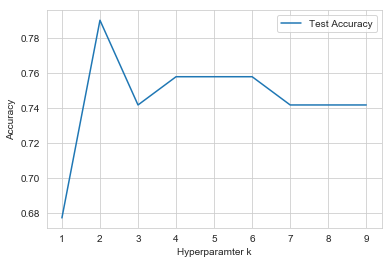

In [25]:
k = np.arange(1,10,1)
plt.plot(k,test_accuracy,label="Test Accuracy")
plt.legend()
plt.xlabel("Hyperparamter k")
plt.ylabel("Accuracy")
plt.show()

### Observation
At the value of k = 2 i.e considering 2 nearest point for classifying we are getting better test accuracy of around 79%

### Predicting status of cancer by accepting age and nodes from the user

In [26]:
#Training the model
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [36]:
age = int(input("Please enter the age : "))
nodes = int(input("Please enter the number of nodes: "))
x=np.array([[age,nodes]])
y= neigh.predict(x)
print("Predicted Status : " , y[0])

Please enter the age : 42
Please enter the number of nodes: 5
Predicted Status :  1
